In [1]:
import numpy as np
import os
import scipy
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

### PBS vs Ghrelin

In [2]:
pbs_color = '0.6'
ghrelin_color = 'goldenrod'

In [4]:
pbs_mat = np.load('PBS_matrix.npy')
ghrelin_mat = np.load('Ghrelin_matrix.npy')

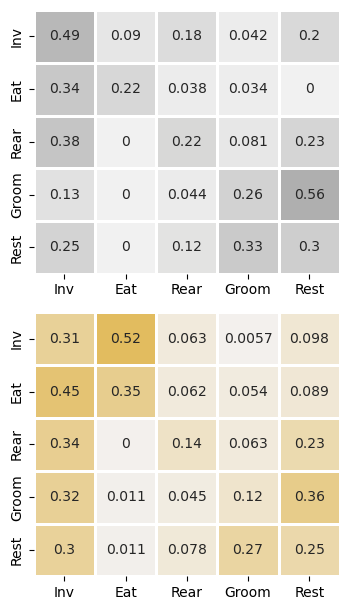

In [5]:
plt.figure(figsize=(3.6,6.2))

plt.subplot(211)
sns.heatmap(data = np.mean(pbs_mat, axis = 0), vmax = 0.75, vmin = 0, annot=True, cmap = sns.light_palette("0.6", as_cmap=True), cbar = False, linewidths = 1,
           xticklabels= ['Inv', 'Eat', 'Rear', 'Groom', 'Rest'], yticklabels= ['Inv', 'Eat', 'Rear', 'Groom', 'Rest'])

plt.subplot(212)
sns.heatmap(data = np.mean(ghrelin_mat, axis = 0), vmax = 0.75, vmin = 0, annot=True, cmap = sns.light_palette("goldenrod", as_cmap=True), cbar = False, linewidths = 1,
           xticklabels= ['Inv', 'Eat', 'Rear', 'Groom', 'Rest'], yticklabels= ['Inv', 'Eat', 'Rear', 'Groom', 'Rest'])

plt.tight_layout()

In [15]:
small_pbs_mat = np.load('PBS_small_matrix.npy')
small_ghrelin_mat = np.load('Ghrelin_small_matrix.npy')

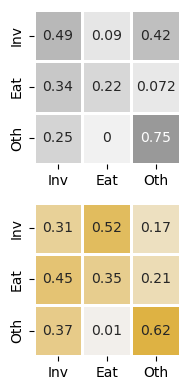

In [17]:
plt.figure(figsize=(2,4))

plt.subplot(211)
sns.heatmap(data = np.mean(small_pbs_mat, axis = 0), vmax = 0.75, vmin = 0, annot=True, cmap = sns.light_palette("0.6", as_cmap=True), cbar = False, linewidths = 1,
           xticklabels= ['Inv', 'Eat', 'Oth'], yticklabels= ['Inv', 'Eat', 'Oth'])

plt.subplot(212)
sns.heatmap(data = np.mean(small_ghrelin_mat, axis = 0), vmax = 0.75, vmin = 0, annot=True, cmap = sns.light_palette("goldenrod", as_cmap=True), cbar = False, linewidths = 1,
           xticklabels= ['Inv', 'Eat', 'Oth'], yticklabels= ['Inv', 'Eat', 'Oth'])

plt.tight_layout()

In [6]:
transmat_pbs_array = np.load('PBS_matrix_data.npy')
transmat_ghrelin_array = np.load('Ghrelin_matrix_data.npy')

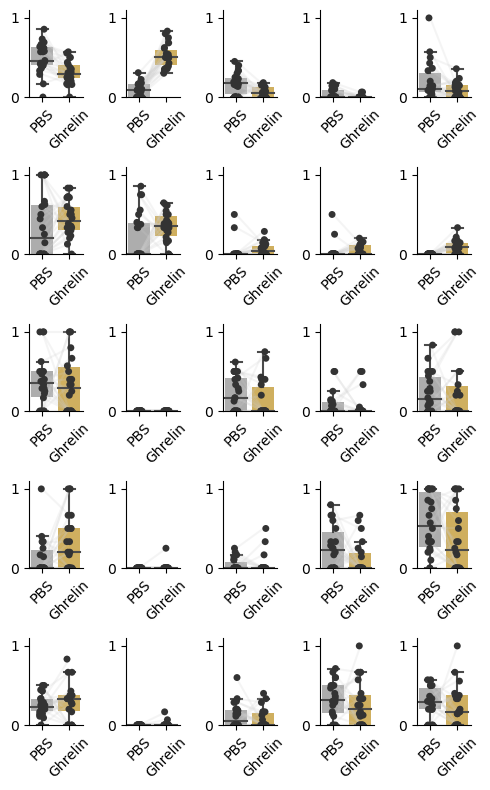

In [7]:
plt.figure(figsize=(5,8))

for x in np.arange(25):  
    plt.subplot(5,5,x+1)
    
    ax = sns.boxplot(data =[transmat_pbs_array[x], transmat_ghrelin_array[x]], palette = [pbs_color, ghrelin_color], showfliers=False, boxprops = dict(linewidth=0, alpha=0.8))
    sns.stripplot(data =[transmat_pbs_array[x], transmat_ghrelin_array[x]],  color = '0.2')

    plt.plot([transmat_pbs_array[x], transmat_ghrelin_array[x]], c = '0.8', alpha = 0.2)
    
    plt.ylim(0,1.1)
    plt.xticks([0,1],['PBS', 'Ghrelin'], rotation = 45)
    plt.yticks([0,1],[0,1])
    plt.tight_layout()
    sns.despine()

In [11]:
pbs_eat = np.load('eat_pbs.npy')
ghrelin_eat = np.load('eat_ghrelin.npy')

chow_factor = 3.1 #Based on Envigo 18% protein chow this is kcal factor

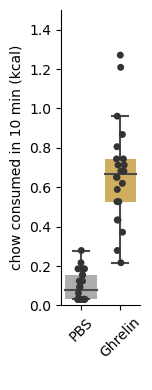

In [12]:
plt.figure(figsize=(1.6,4))
ax = sns.boxplot(data =[pbs_eat*chow_factor, ghrelin_eat*chow_factor], palette = [pbs_color, ghrelin_color], showfliers=False, boxprops = dict(linewidth=0, alpha=0.8))
sns.stripplot(data =[pbs_eat*chow_factor, ghrelin_eat*chow_factor],  color = '0.2')
#ax.set_yscale('log')

#plt.axhline(y=1, color= 'k',alpha = 0.7, linestyle='--')

plt.ylim(0,1.5)
plt.ylabel('chow consumed in 10 min (kcal)')
plt.xticks([0, 1], ['PBS', "Ghrelin"], rotation = 45)
plt.xlabel(' ')
#plt.yticks([0.001,1, 1000], ['$10^{-3}$',1, 1000])


plt.tight_layout()
sns.despine()

In [13]:
pbs_durs = np.load('PBS_dur.npy')
ghrelin_durs = np.load('Ghrelin_dur.npy')

pbs_freqs = np.load('PBS_freq.npy')
ghrelin_freqs = np.load('Ghrelin_freq.npy')

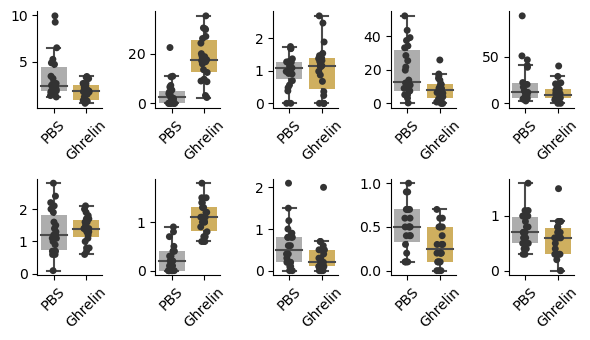

In [14]:
plt.figure(figsize=(6,3.5))

for i, c in enumerate(pbs_durs):
    plt.subplot(2,5,i+1)
    
    # print(scipy.stats.ttest_rel(np.asarray(pbs_durs[i])/25, np.asarray(ghrelin_durs[i])/25)[0])
    
    ax = sns.boxplot(data =[np.asarray(pbs_durs[i])/25, np.asarray(ghrelin_durs[i])/25], palette = [pbs_color, ghrelin_color], showfliers=False, boxprops = dict(linewidth=0, alpha=0.8))
    sns.stripplot(data =[np.asarray(pbs_durs[i])/25, np.asarray(ghrelin_durs[i])/25],  color = '0.2')
    
    plt.xticks([0, 1], ['PBS', "Ghrelin"], rotation = 45)
    


    plt.tight_layout()
    sns.despine()
    
for i, c in enumerate(pbs_freqs):
    plt.subplot(2,5,i+6)

    ax = sns.boxplot(data =[np.asarray(pbs_freqs[i])/10, np.asarray(ghrelin_freqs[i])/10], palette = [pbs_color, ghrelin_color], showfliers=False, boxprops = dict(linewidth=0, alpha=0.8))
    sns.stripplot(data =[np.asarray(pbs_freqs[i])/10, np.asarray(ghrelin_freqs[i])/10],  color = '0.2')
    
    plt.xticks([0, 1], ['PBS', "Ghrelin"], rotation = 45)
    


    plt.tight_layout()
    sns.despine()

### Fed vs Fasted

In [20]:
fed_color = '0.6'
fasted_color = '#3D81AC'

In [22]:
fed_mat = np.load('Fed_matrix.npy')
fasted_mat = np.load('Fasted_matrix.npy')

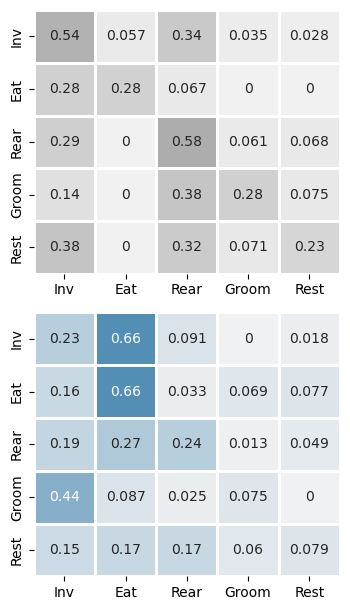

In [23]:
plt.figure(figsize=(3.6,6.2))

plt.subplot(211)
sns.heatmap(data = np.mean(fed_mat, axis = 0), vmax = 0.75, vmin = 0, annot=True, cmap = sns.light_palette("0.6", as_cmap=True), cbar = False, linewidths = 1,
           xticklabels= ['Inv', 'Eat', 'Rear', 'Groom', 'Rest'], yticklabels= ['Inv', 'Eat', 'Rear', 'Groom', 'Rest'])

plt.subplot(212)
sns.heatmap(data = np.mean(fasted_mat, axis = 0), vmax = 0.75, vmin = 0, annot=True, cmap = sns.light_palette("#3D81AC", as_cmap=True), cbar = False, linewidths = 1,
           xticklabels= ['Inv', 'Eat', 'Rear', 'Groom', 'Rest'], yticklabels= ['Inv', 'Eat', 'Rear', 'Groom', 'Rest'])

plt.tight_layout()

In [31]:
sm_fed_mat = np.load('Small_fed_mat.npy')
sm_fasted_mat = np.load('Small_fasted_mat.npy')

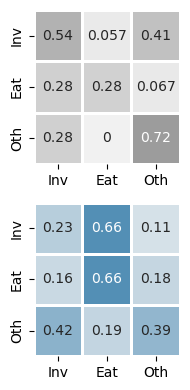

In [32]:
plt.figure(figsize=(2,4))

plt.subplot(211)
sns.heatmap(data = np.mean(sm_fed_mat, axis = 0), vmax = 0.75, vmin = 0, annot=True, cmap = sns.light_palette("0.6", as_cmap=True), cbar = False, linewidths = 1,
           xticklabels= ['Inv', 'Eat', 'Oth'], yticklabels= ['Inv', 'Eat', 'Oth'])

plt.subplot(212)
sns.heatmap(data = np.mean(sm_fasted_mat, axis = 0), vmax = 0.75, vmin = 0, annot=True, cmap = sns.light_palette(fasted_color, as_cmap=True), cbar = False, linewidths = 1,
           xticklabels= ['Inv', 'Eat', 'Oth'], yticklabels= ['Inv', 'Eat', 'Oth'])

plt.tight_layout()

In [24]:
transmat_fed_array = np.load('Fed_matrix_data.npy')
transmat_fasted_array = np.load('Fasted_matrix_data.npy')

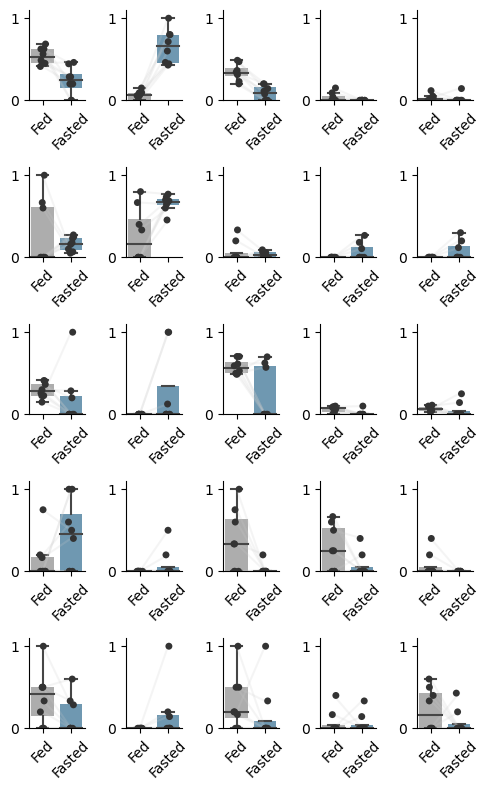

In [25]:
plt.figure(figsize=(5,8))

for x in np.arange(25):  
    plt.subplot(5,5,x+1)
    
    ax = sns.boxplot(data =[transmat_fed_array[x], transmat_fasted_array[x]], palette = [fed_color, fasted_color], showfliers=False, boxprops = dict(linewidth=0, alpha=0.8))
    sns.stripplot(data =[transmat_fed_array[x], transmat_fasted_array[x]],  color = '0.2')

    plt.plot([transmat_fed_array[x], transmat_fasted_array[x]], c = '0.8', alpha = 0.2)
    
    plt.ylim(0,1.1)
    plt.xticks([0,1],['Fed', 'Fasted'], rotation = 45)
    plt.yticks([0,1],[0,1])
    plt.tight_layout()
    sns.despine()

In [26]:
fed_eat = np.load('Fed_eat.npy')
fasted_eat = np.load('Fasted_eat.npy')

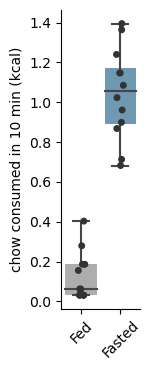

In [27]:
plt.figure(figsize=(1.6,4))

ax = sns.boxplot(data =[fed_eat*chow_factor, fasted_eat*chow_factor], palette = [fed_color, fasted_color], showfliers=False, boxprops = dict(linewidth=0, alpha=0.8))
sns.stripplot(data =[fed_eat*chow_factor, fasted_eat*chow_factor],  color = '0.2')
#ax.set_yscale('log')

#plt.axhline(y=1, color= 'k',alpha = 0.7, linestyle='--')

# plt.ylim(0,1.5)
plt.ylabel('chow consumed in 10 min (kcal)')
plt.xticks([0, 1], ['Fed', "Fasted"], rotation = 45)
plt.xlabel(' ')
#plt.yticks([0.001,1, 1000], ['$10^{-3}$',1, 1000])


plt.tight_layout()
sns.despine()


In [29]:
fed_durs = np.load('Fed_dur.npy')
fasted_durs = np.load('Fasted_dur.npy')

fed_freqs = np.load('Fed_freq.npy')
fasted_freqs = np.load('Fasted_freq.npy')

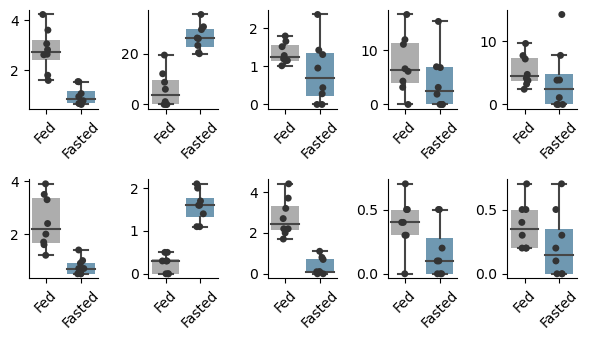

In [30]:
plt.figure(figsize=(6,3.5))

for i, c in enumerate(fed_durs):
    plt.subplot(2,5,i+1)
    
    ax = sns.boxplot(data =[np.asarray(fed_durs[i])/25, np.asarray(fasted_durs[i])/25], palette = [fed_color, fasted_color], showfliers=False, boxprops = dict(linewidth=0, alpha=0.8))
    sns.stripplot(data =[np.asarray(fed_durs[i])/25, np.asarray(fasted_durs[i])/25],  color = '0.2')
    
    plt.xticks([0, 1], ['Fed', "Fasted"], rotation = 45)

    plt.tight_layout()
    sns.despine()
    
for i, c in enumerate(fed_freqs):
    plt.subplot(2,5,i+6)
    
    ax = sns.boxplot(data =[np.asarray(fed_freqs[i])/10, np.asarray(fasted_freqs[i])/10], palette = [fed_color, fasted_color], showfliers=False, boxprops = dict(linewidth=0, alpha=0.8))
    sns.stripplot(data =[np.asarray(fed_freqs[i])/10, np.asarray(fasted_freqs[i])/10],  color = '0.2')
    
    plt.xticks([0, 1], ['Fed', "Fasted"], rotation = 45)
    
    plt.tight_layout()
    sns.despine()

### now compare all 4

In [34]:
PBS_mean_fed_dist, ghrelin_mean_fed_dist = np.load('Fed_cosine.npy')
PBS_mean_fasted_dist, ghrelin_mean_fasted_dist = np.load('Fasted_cosine.npy')

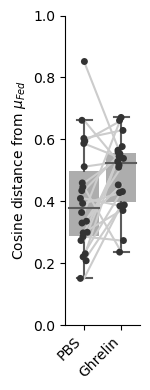

In [35]:
plt.figure(figsize=(1.6,4))

ax = sns.boxplot(data = [PBS_mean_fed_dist, ghrelin_mean_fed_dist], palette = ['0.6'], showfliers = False, boxprops = dict(linewidth=0, alpha=0.8))
sns.stripplot(data = [PBS_mean_fed_dist, ghrelin_mean_fed_dist], color = '0.2')
plt.plot([PBS_mean_fed_dist, ghrelin_mean_fed_dist], c = '0.8')
plt.xticks([0,1], ['PBS', 'Ghrelin'], rotation = 45, ha = 'right')
plt.ylim(0, 1)
plt.ylabel(r'Cosine distance from $\mu_{Fed}$')
sns.despine()
plt.tight_layout()


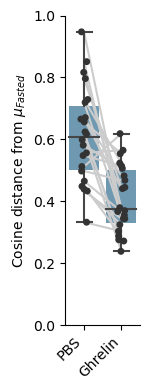

In [36]:
plt.figure(figsize=(1.6,4))

plt.plot([PBS_mean_fasted_dist, ghrelin_mean_fasted_dist], c = '0.8')
sns.boxplot(data = [PBS_mean_fasted_dist, ghrelin_mean_fasted_dist], palette = ['#3D81AC'], showfliers = False, boxprops = dict(linewidth=0, alpha=0.8))
sns.stripplot(data = [PBS_mean_fasted_dist, ghrelin_mean_fasted_dist], color = '0.2')
plt.xticks([0,1], ['PBS', 'Ghrelin'], rotation = 45, ha = 'right')
plt.ylabel(r'Cosine distance from $\mu_{Fasted}$')
plt.ylim(0, 1)

plt.tight_layout()
sns.despine()

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [48]:
transitions = pd.read_pickle('Trans_for_LDA')
states = pd.read_pickle('States_for_LDA').values.ravel()

In [49]:
n_components = 2
lda = LDA(n_components = n_components, solver = 'svd')
lda_model = lda.fit(transitions, states)

In [50]:
X_lda = lda_model.fit_transform(transitions, states)

In [51]:
lda_model.explained_variance_ratio_

array([0.72524839, 0.19145005])

In [53]:
lda_df = pd.DataFrame(X_lda, columns = ['LD' + str(num+1) for num in np.arange(X_lda.shape[1])])
lda_df['State'] = states

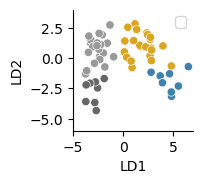

In [54]:
plt.figure(figsize = (2,2))
ax =plt.gca()
plt.xlabel('LD1')
plt.ylabel('LD2')
sns.scatterplot(data = lda_df, x = 'LD1', y = 'LD2', hue = 'State', palette = ['goldenrod', '0.6', '#3D81AC', '0.4'])
plt.legend('')
plt.ylim(-6, 4)
plt.xlim(-5, 7)
sns.despine()
plt.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


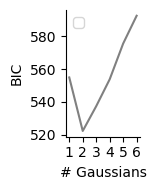

In [56]:
### fit to different numbers of gaussian mixtures

from sklearn.mixture import GaussianMixture as GMM

n_components = np.arange(1, 7)
X = lda_df[['LD1', 'LD2']]
models = [GMM(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.figure(figsize = (1.6,2))
plt.plot(n_components, [m.bic(X) for m in models], color = 'gray')
plt.xticks(n_components)
plt.legend(loc='best')
plt.xlabel('# Gaussians');
plt.ylabel('BIC')
plt.tight_layout()
sns.despine()

In [57]:
# There are 2 clusters in dataset - corresponding to hungry vs. sated

gmm = GMM(n_components=2, random_state = 1, max_iter = 1000, reg_covar = 0.3, covariance_type = "diag").fit(X)
labels = gmm.predict(X)
lda_df['GMM_labels'] = labels
lda_df['GMM_labels'] = lda_df['GMM_labels'].map(lambda x: 'Cluster ' + str(x+1))
lda_df.sort_values('GMM_labels', inplace = True)

Text(0.5, -7.277777777777782, 'LD1')

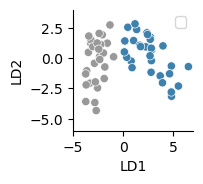

In [58]:
plt.figure(figsize = (2,2))
sns.scatterplot(data = lda_df, x = 'LD1', y = 'LD2', hue = 'GMM_labels', 
                palette = ['#3D81AC', '0.6'])
plt.legend('')
plt.ylim(-6, 4)
plt.xlim(-5, 7)
plt.tight_layout()
sns.despine()
plt.ylabel('LD2')
plt.xlabel('LD1')